# 네이버 영화평 데이터 감성분석

## 데이터 다운로드

In [549]:
# -*- encoding:utf8 -*-

In [550]:
# data download
# wget -P A B : B의 데이터를 A에 저장.
#!wget -P data https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt # train data 
#!wget -P data https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt # test data# data download


In [551]:
!head data/ratings_train.txt

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1


In [552]:
!head data/ratings_test.txt

id	document	label
6270596	굳 ㅋ	1
9274899	GDNTOPCLASSINTHECLUB	0
8544678	뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아	0
6825595	지루하지는 않은데 완전 막장임... 돈주고 보기에는....	0
6723715	3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??	0
7898805	음악이 주가 된, 최고의 음악영화	1
6315043	진정한 쓰레기	0
6097171	마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다	0
8932678	갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다	0


In [553]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import re
import konlpy
from konlpy.tag import Twitter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from math import sqrt
import konlpy

# create new column with if and for loop with the Sentiment Phrase column

데이터 임포트

Python의 pandas library read_csv() 함수로 text 파일, csv 파일을 임포트해서 판다스 DataFrame 형태로 저장

In [554]:
path = 'Users/song-yeongsug/workspace/kaggle_nlp'

In [555]:
train_data = pd.read_csv('data/ratings_train.txt', encoding='utf-8', delimiter='\t', keep_default_na=False)
test_data = pd.read_csv('data/ratings_test.txt',encoding='utf-8', delimiter='\t', keep_default_na=False)
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
id          150000 non-null int64
document    150000 non-null object
label       150000 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
id          50000 non-null int64
document    50000 non-null object
label       50000 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [556]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [557]:
train_data.tail()

,id,document,label
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0


# label을 긍정과 부정으로  나누고 막대그래프로 시각화

In [558]:
Sentiment_words=[]
for row in train_data['label']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train_data['Sentiment_words'] = Sentiment_words

# count values of Sentiment Phrase

In [559]:
word_count=pd.value_counts(train_data['Sentiment_words'].values, sort=False)
word_count

negative    75173
positive    74827
dtype: int64

# some visually for Sentiment phrase

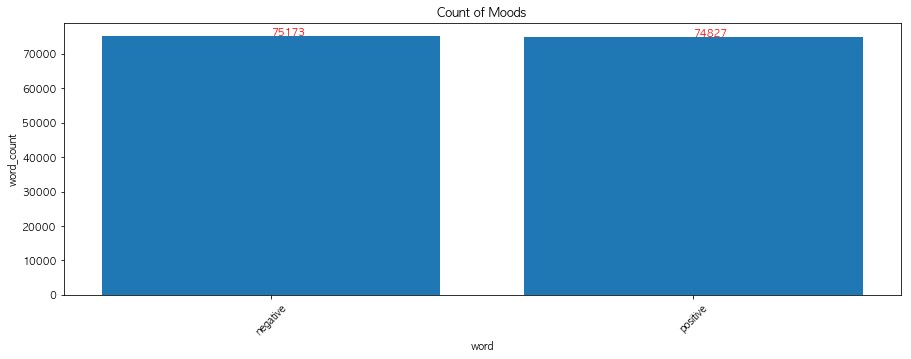

In [560]:
Index = [1,2]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='red', fontweight='bold')

# 데이터 정제

In [561]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^ㄱ-힣]', ' ',review)
    review = review.split()
    return (' '.join(review))

In [562]:
corpus= []
for i in range(0, 150000):
    corpus.append(review_to_words(train_data['document'][i]))

In [563]:
corpus1= []
for i in range(0, 50000):
    corpus1.append(review_to_words(test_data['document'][i]))


# create new column and merge it with the new cleaning list

In [564]:
train_data['new_document']=corpus

# drop the old data

In [565]:
train_data.drop(['document'],axis=1, inplace=True)

In [566]:
train_data.head()

,id,label,Sentiment_words,new_document
0,9976970,0,negative,아 더빙 진짜 짜증나네요 목소리
1,3819312,1,positive,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2,10265843,0,negative,너무재밓었다그래서보는것을추천한다
3,9045019,0,negative,교도소 이야기구먼 솔직히 재미는 없다 평점 조정
4,6483659,1,positive,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...


# Select positive Sentiment from data set

In [567]:

positive=train_data[train_data['Sentiment_words']==('positive')]

In [568]:
words = ' '.join(positive['new_document'])
split_word = " ".join([word for word in words.split()])

# prepare the data to visual it


In [569]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [570]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [571]:
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

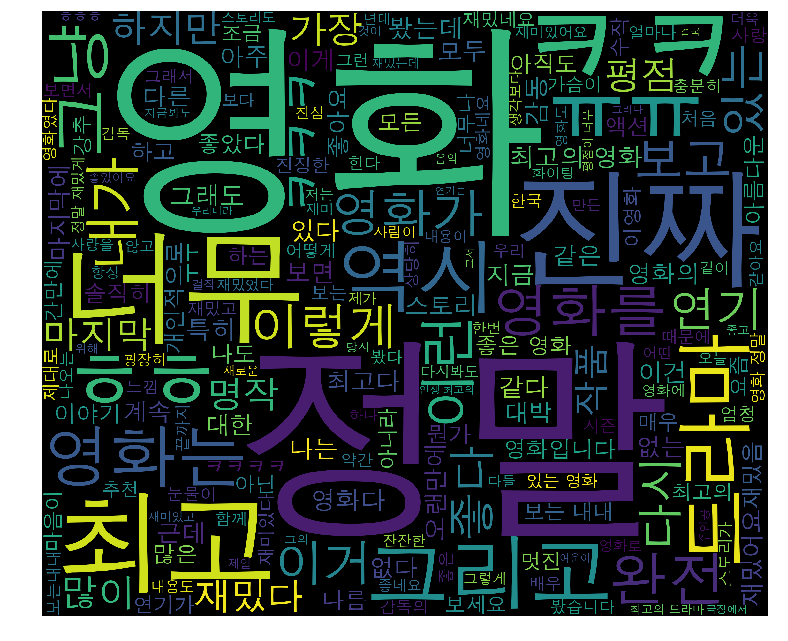

In [572]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# predict

In [573]:
text_train, y_train = train_data['new_document'].as_matrix(), train_data['label'].as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [574]:

test_datadf_test = pd.read_csv('data/ratings_test.txt', delimiter='\t', keep_default_na=False)
text_test = test_data['document'].as_matrix()
y_test = test_data['label'].as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [575]:
len(text_train), np.bincount(y_train)

(150000, array([75173, 74827]))

In [576]:
len(text_test), np.bincount(y_test)

(50000, array([24827, 25173]))

In [577]:
from konlpy.tag import Twitter
twitter = Twitter()

def twitter_tokenizer(text):
    tokens = twitter.morphs(text)
    return tokens

In [578]:
X_test_twit = twit_grid.best_estimator_.named_steps["tfidfvectorizer"].transform(text_test)
score = twit_grid.best_estimator_.named_steps["logisticregression"].score(X_test_twit, y_test)
print("테스트 세트 점수: {:.3f}".format(score))

테스트 세트 점수: 0.705


# Now here some steps to count every word in postive Sentiment

In [579]:
pos=positive['new_document']

In [580]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = twitter_tokenizer,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)

In [581]:
pos_words = vectorizer.fit_transform(pos)

In [582]:
pos_words = pos_words.toarray()

In [583]:
pos= vectorizer.get_feature_names()

In [584]:
pos

['ㄷ',
 'ㄷㄷ',
 'ㄷㄷㄷ',
 'ㅁ',
 'ㅇ',
 'ㅇㅇ',
 'ㅉㅉ',
 'ㅋ',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋ',
 'ㅎ',
 'ㅎㄷㄷ',
 'ㅎㅎ',
 'ㅎㅎㅎ',
 'ㅎㅎㅎㅎ',
 'ㅜ',
 'ㅜㅜ',
 'ㅠ',
 'ㅠㅜ',
 'ㅠㅠ',
 'ㅠㅠㅠ',
 'ㅠㅠㅠㅠ',
 'ㅡ',
 'ㅡㅡ',
 '가',
 '가고',
 '가끔',
 '가는',
 '가면',
 '가볍',
 '가본',
 '가서',
 '가수',
 '가슴',
 '가시',
 '가요',
 '가장',
 '가족',
 '가족영화',
 '가지',
 '가진',
 '가치',
 '가히',
 '각본',
 '간',
 '간다',
 '간만',
 '갈',
 '갈등',
 '갈수록',
 '감',
 '감각',
 '감독',
 '감동',
 '감명',
 '감사',
 '감사합',
 '감상',
 '감성',
 '감정',
 '감탄',
 '감히',
 '갑',
 '갑자기',
 '갔',
 '강',
 '강력',
 '강렬한',
 '강추',
 '강한',
 '같',
 '같고',
 '같네',
 '같다',
 '같아',
 '같았',
 '같은',
 '같이',
 '같지',
 '개',
 '개그',
 '개봉',
 '개성',
 '개인',
 '갠',
 '걍',
 '거',
 '거기',
 '거나',
 '거리',
 '거야',
 '거의',
 '거지',
 '건',
 '건가',
 '건데',
 '건지',
 '걸',
 '걸작',
 '검색',
 '겁나',
 '겁니',
 '것',
 '게',
 '게요',
 '게임',
 '겟',
 '겠',
 '겨',
 '겨울',
 '견자단',
 '결과',
 '결국',
 '결론',
 '결말',
 '결코',
 '결혼',
 '경찰',
 '경험',
 '계',
 '계기',
 '계속',
 '고',
 '고도',
 '고독',
 '고맙',
 '고민',
 '고양이',
 '고요',
 '고전',
 '고통',
 '고픈',
 '곡',
 '곤',
 '곳',
 '공',
 '공간',
 '공감',
 '공부',
 

In [585]:
print (pos_words.shape)

(74827, 2000)


In [586]:
dist = np.sum(pos_words, axis=0)
for tag, count in zip(pos, dist):
    print (tag,count)

ㄷ 61
ㄷㄷ 152
ㄷㄷㄷ 55
ㅁ 56
ㅇ 122
ㅇㅇ 104
ㅉㅉ 58
ㅋ 1489
ㅋㅋ 2577
ㅋㅋㅋ 1280
ㅋㅋㅋㅋ 553
ㅋㅋㅋㅋㅋ 162
ㅋㅋㅋㅋㅋㅋ 70
ㅋㅋㅋㅋㅋㅋㅋ 58
ㅎ 758
ㅎㄷㄷ 58
ㅎㅎ 1346
ㅎㅎㅎ 276
ㅎㅎㅎㅎ 72
ㅜ 300
ㅜㅜ 568
ㅠ 986
ㅠㅜ 82
ㅠㅠ 1621
ㅠㅠㅠ 233
ㅠㅠㅠㅠ 132
ㅡ 199
ㅡㅡ 186
가 13983
가고 90
가끔 143
가는 403
가면 53
가볍 185
가본 70
가서 113
가수 56
가슴 1161
가시 56
가요 76
가장 925
가족 636
가족영화 68
가지 266
가진 128
가치 171
가히 58
각본 98
간 249
간다 125
간만 340
갈 120
갈등 81
갈수록 148
감 559
감각 72
감독 1300
감동 3858
감명 145
감사 73
감사합 196
감상 70
감성 272
감정 389
감탄 154
감히 76
갑 204
갑자기 82
갔 184
강 88
강력 58
강렬한 73
강추 575
강한 58
같 478
같고 81
같네 228
같다 939
같아 751
같았 127
같은 1406
같이 396
같지 109
개 673
개그 79
개봉 434
개성 75
개인 541
갠 70
걍 176
거 3509
거기 108
거나 71
거리 131
거야 115
거의 161
거지 70
건 874
건가 117
건데 158
건지 163
걸 742
걸작 394
검색 76
겁나 92
겁니 77
것 5024
게 6183
게요 68
게임 91
겟 167
겠 1438
겨 73
겨울 60
견자단 66
결과 54
결국 214
결론 54
결말 654
결코 72
결혼 119
경찰 82
경험 72
계 104
계기 54
계속 575
고 8092
고도 56
고독 53
고맙 69
고민 66
고양이 56
고요 74
고전 120
고통 83
고픈 64
곡 72
곤 102
곳 232
공 54
공간 58
공감 529
공부 66
공포 287
공포영화 253
과 4191
과거 175
과는 90
과연 99
과의 

웃 66
웃겨 180
웃겼 107
웃고 82
웃기 393
웃긴 132
웃김 136
웃다 54
웃었 118
웃으 116
웃음 317
워 69
원 80
원래 133
원작 452
월 84
웰 65
위 135
위대한 102
위로 74
위한 237
위해 283
유 87
유덕화 58
유머 140
유명한 64
유일 56
유치 261
유쾌 421
유쾌하 123
으 153
으나 134
으니 71
으로 3795
으로는 101
으로도 203
으로서 64
으로써 77
으론 93
으리 104
으며 62
으면 993
은 9748
은걸 95
은근 109
은데 296
을 16297
을까 639
을까요 75
을텐데 136
음 4356
음악 961
응원 102
의 18944
의도 58
의리 139
의문 56
의미 337
의외로 107
이 29836
이건 547
이고 839
이기 106
이기도 56
이긴 70
이나 572
이네 466
이니 58
이다 2774
이든 70
이라 494
이라고 299
이라는 448
이라니 105
이라도 100
이라서 89
이란 453
이랑 412
이래 125
이러 74
이런 2459
이렇 63
이렇게 993
이름 203
이리 174
이만 55
이며 132
이면 81
이미 101
이미지 60
이번 181
이보 58
이뻐 109
이쁘 338
이쁜 83
이쁨 67
이상 538
이상은 54
이상한 55
이야 305
이야기 1188
이어 73
이어서 81
이었 920
이에요 250
이여 86
이연걸 111
이영화 1012
이유 314
이자 98
이제 422
이제야 134
이지 150
이지만 375
이해 474
이해할 90
이후 252
인 3229
인가 376
인간 754
인거 142
인공 153
인기 70
인데 999
인물 211
인상 458
인생 1107
인지 380
인해 68
일 716
일단 156
일본 486
일상 141
일이 164
일품 105
읽어 63
임 883
입 93
입니 1947
입장 69
잇 126
잇는 102
잇어 92
있 3845
있게 208
있겠 79

In [587]:
postive_new= pd.DataFrame(dist)

In [588]:
postive_new.columns=['word_count']

In [589]:
postive_new['word'] = pd.Series(pos, index=postive_new.index)

In [590]:
postive_new1=postive_new[['word','word_count']]

In [591]:
postive_new1.head()

,word,word_count
0,ㄷ,61
1,ㄷㄷ,152
2,ㄷㄷㄷ,55
3,ㅁ,56
4,ㅇ,122


In [592]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])

In [593]:
top_30_words.head(50)

,word,word_count
1418,이,29836
1286,영화,26317
400,다,24862
1412,의,18944
1405,을,16297
1230,에,14154
28,가,13983
468,도,12242
386,는,11577
1401,은,9748


In [594]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:, 2].values

In [595]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.40, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

In [596]:
mse = ((y_pred - y_test) ** 2).mean()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
#mse

코드 참고 :   
https://github.com/aptlo10/-Sentiment-Analysis-on-Movie-Reviews/blob/master/Sentiment_Analysison_MovieReviews_15-2-2018.ipynb

https://github.com/corazzon/KaggleStruggle/blob/master/movie_reviews/movie-review-Scikit-Learn-Tutorial.ipynb


https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/07-konlpy.ipynb

워드 클라우드 한글처리 : http://pinkwink.kr/1029